<a href="https://colab.research.google.com/github/Mubarakhussain1/Comcast-Telecom-Consumer-Complaints/blob/main/comcast_telecom_consumer_complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Comcast Telecom Consumer Complaints .**

![](https://manishgupta-ind.github.io/images/comcast-2.jpg?raw=true)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1: Import data into Python environment**

In [2]:
comcast_tele_consumer= pd.read_csv('/content/1568699544_comcast_telecom_complaints_data_2.zip')

In [3]:
comcast_tele_consumer.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


Step 1: Check the duplicate columns or Variables with duplicate names and delete such columns

In [4]:
comcast_tele_consumer.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [5]:
comcast_tele_consumer.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
comcast_tele_consumer.shape

(2224, 11)

In [8]:
# Step 3: Missing value Treatment
comcast_tele_consumer.isnull().sum().sort_values(ascending=False)

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

No Missing value found so we proceed to step

In [ ]:
# Step 3: duplicate value Treatment
comcast_tele_consumer.duplicated().sum()

0

No duplicate value found so we proceed to step

**Task 2: Provide the trend chart for the number of complaints at monthly and
daily granularity levels.**

In [ ]:
comcast_tele_consumer.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [ ]:
comcast_tele_consumer['Date_month_year']


0       22-Apr-15
1       04-Aug-15
2       18-Apr-15
3       05-Jul-15
4       26-May-15
          ...    
2219    04-Feb-15
2220    06-Feb-15
2221    06-Sep-15
2222    23-Jun-15
2223    24-Jun-15
Name: Date_month_year, Length: 2224, dtype: object

In [ ]:
comcast_tele_consumer['Date']

0       22-04-15
1       04-08-15
2       18-04-15
3       05-07-15
4       26-05-15
          ...   
2219    04-02-15
2220    06-02-15
2221    06-09-15
2222    23-06-15
2223    24-06-15
Name: Date, Length: 2224, dtype: object

In [ ]:
comcast_tele_consumer['Time']

0        3:53:50 PM
1       10:22:56 AM
2        9:55:47 AM
3       11:59:35 AM
4        1:25:26 PM
           ...     
2219     9:13:18 AM
2220     1:24:39 PM
2221     5:28:41 PM
2222    11:13:30 PM
2223    10:28:33 PM
Name: Time, Length: 2224, dtype: object

In [9]:
# Add Date Month year with Time and save it into Date_Full
comcast_tele_consumer['time']=pd.to_datetime(comcast_tele_consumer['Time'])

In [10]:
comcast_tele_consumer['Date_Full']=comcast_tele_consumer['Date_month_year']+' '+comcast_tele_consumer['Time']

In [11]:
#Convert Date_Full and Date_month_year to Datetime Format
comcast_tele_consumer['Date_Full']=pd.to_datetime(comcast_tele_consumer['Date_Full'])

In [12]:
comcast_tele_consumer['Date_month_year']=pd.to_datetime(comcast_tele_consumer['Date_month_year'])

In [13]:
comcast_tele_consumer['Date_month_year']

0      2015-04-22
1      2015-08-04
2      2015-04-18
3      2015-07-05
4      2015-05-26
          ...    
2219   2015-02-04
2220   2015-02-06
2221   2015-09-06
2222   2015-06-23
2223   2015-06-24
Name: Date_month_year, Length: 2224, dtype: datetime64[ns]

In [14]:
comcast_tele_consumer_monthly=comcast_tele_consumer.set_index(comcast_tele_consumer['Date_month_year'])

In [15]:
comcast_tele_consumer_monthly

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,time,Date_Full
Date_month_year,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2023-05-31 15:53:50,2015-04-22 15:53:50
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2023-05-31 10:22:56,2015-08-04 10:22:56
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2023-05-31 09:55:47,2015-04-18 09:55:47
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2023-05-31 11:59:35,2015-07-05 11:59:35
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2023-05-31 13:25:26,2015-05-26 13:25:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2023-05-31 09:13:18,2015-02-04 09:13:18
2015-02-06,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2023-05-31 13:24:39,2015-02-06 13:24:39
2015-09-06,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2023-05-31 17:28:41,2015-09-06 17:28:41


<Axes: title={'center': 'Number of complaints at Monthly granularity levels'}, xlabel='Date_month_year', ylabel='Number of complaints'>

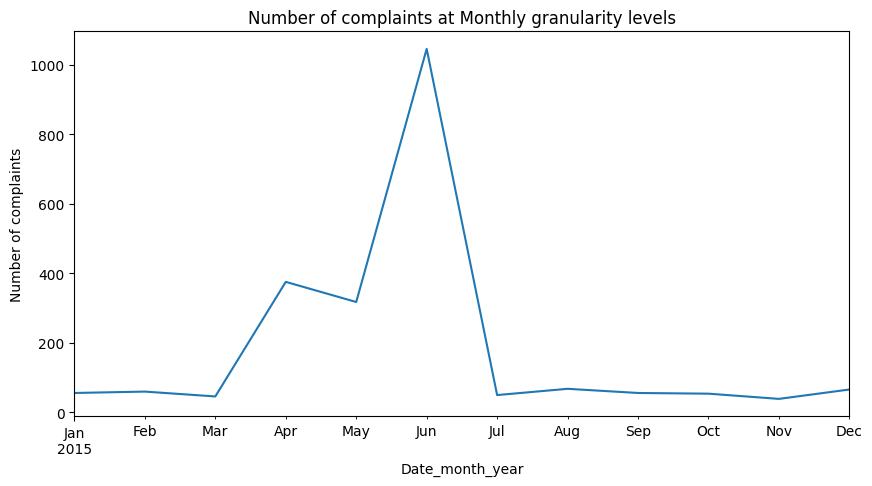

In [17]:

plt.figure(figsize=(10,5))
plt.title('Number of complaints at Monthly granularity levels')
plt.ylabel('Number of complaints')
comcast_tele_consumer_monthly.groupby(pd.Grouper(freq="M")).size().plot()

In [18]:
comcast_tele_consumer['day of month']=pd.to_datetime(comcast_tele_consumer['Date'])

In [19]:
comcast_tele_consumer_daily=comcast_tele_consumer.set_index(comcast_tele_consumer['day of month'])

In [20]:
comcast_tele_consumer_daily

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,time,Date_Full,day of month
day of month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2023-05-31 15:53:50,2015-04-22 15:53:50,2015-04-22
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2023-05-31 10:22:56,2015-08-04 10:22:56,2015-04-08
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2023-05-31 09:55:47,2015-04-18 09:55:47,2015-04-18
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2023-05-31 11:59:35,2015-07-05 11:59:35,2015-05-07
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2023-05-31 13:25:26,2015-05-26 13:25:26,2015-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-02,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2023-05-31 09:13:18,2015-02-04 09:13:18,2015-04-02
2015-06-02,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2023-05-31 13:24:39,2015-02-06 13:24:39,2015-06-02
2015-06-09,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2023-05-31 17:28:41,2015-09-06 17:28:41,2015-06-09


<Axes: title={'center': 'Number of complaints at Daily granularity levels'}, xlabel='day of month', ylabel='Number of Complaints'>

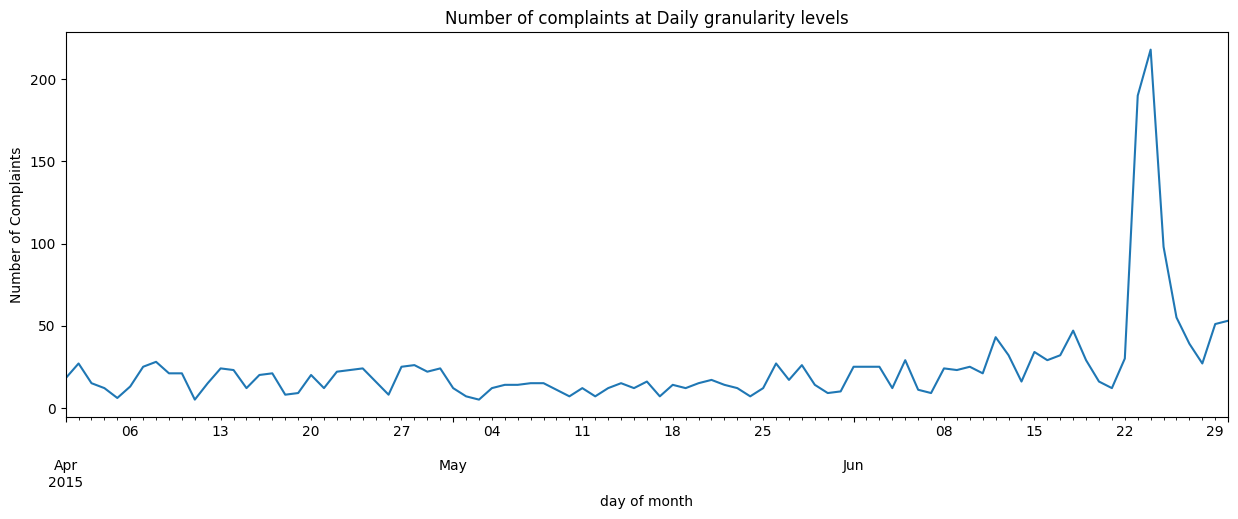

In [21]:
plt.figure(figsize=(15,5))
plt.title('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
comcast_tele_consumer_daily.groupby(pd.Grouper(freq="D")).size().plot()



**Task 3: Provide a table with the frequency of complaint types.**

In [22]:
# To get the frequency of complaint types first we have to see all complaint types and check for duplicate, case sensentive
# Incomplete data so that we can make analytics better
comcast_tele_consumer_complaint_type=comcast_tele_consumer['Customer Complaint' ].value_counts()

In [23]:
comcast_tele_consumer_complaint_type.head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Name: Customer Complaint, dtype: int64

In [24]:
# Better to convert all data into uper case or sentence case so duplicate value will shorted
comcast_tele_consumer_complaint_type=comcast_tele_consumer['Customer Complaint' ].str.upper().value_counts()

In [25]:
# Data is huge so we have showed only top 25 Complaint Types. We can show clearly in this table that COMCAST, COMCAST DATA CAP
# COMCAST INTERNET are the Highest top 3 complaint types
comcast_tele_consumer_complaint_type.head(20)

COMCAST                      102
COMCAST DATA CAP              30
COMCAST INTERNET              29
COMCAST DATA CAPS             21
COMCAST BILLING               18
COMCAST SERVICE               15
INTERNET SPEED                15
UNFAIR BILLING PRACTICES      13
DATA CAPS                     13
DATA CAP                      12
COMCAST COMPLAINT             11
COMCAST/XFINITY               11
COMCAST INTERNET SERVICE      10
BILLING                        9
BILLING ISSUES                 8
COMCAST CABLE                  5
INTERNET                       5
COMCAST BILLING COMPLAINT      5
COMCAST ISSUES                 5
COMCAST BILLING PRACTICES      5
Name: Customer Complaint, dtype: int64

**Task 4: Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.**

In [26]:
comcast_tele_consumer['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [27]:
# Convert as per Instruction (Task 4) into New Column without changing the main data so that we can use the main data
# in Future
comcast_tele_consumer['New_Status']=['Open' if Status=='Open' or Status=='Pending' else 'closed'for Status in comcast_tele_consumer['Status'] ]

In [28]:
comcast_tele_consumer['New_Status'].value_counts()

closed    1707
Open       517
Name: New_Status, dtype: int64

In [29]:
comcast_tele_consumer.State

0       Maryland
1        Georgia
2        Georgia
3        Georgia
4        Georgia
          ...   
2219     Florida
2220    Michigan
2221    Michigan
2222    Michigan
2223    Michigan
Name: State, Length: 2224, dtype: object

In [30]:
comcast_tele_consumer_status_by_state=pd.crosstab(comcast_tele_consumer.State,comcast_tele_consumer.New_Status)


In [31]:
comcast_tele_consumer_status_by_state

New_Status,Open,closed
State,,
Alabama,9,17
Arizona,6,14
Arkansas,0,6
California,61,159
Colorado,22,58
Connecticut,3,9
Delaware,4,8
District Of Columbia,2,14
District of Columbia,0,1


<Axes: title={'center': 'status of complaint state wise'}, xlabel='State', ylabel='no. of complaints'>

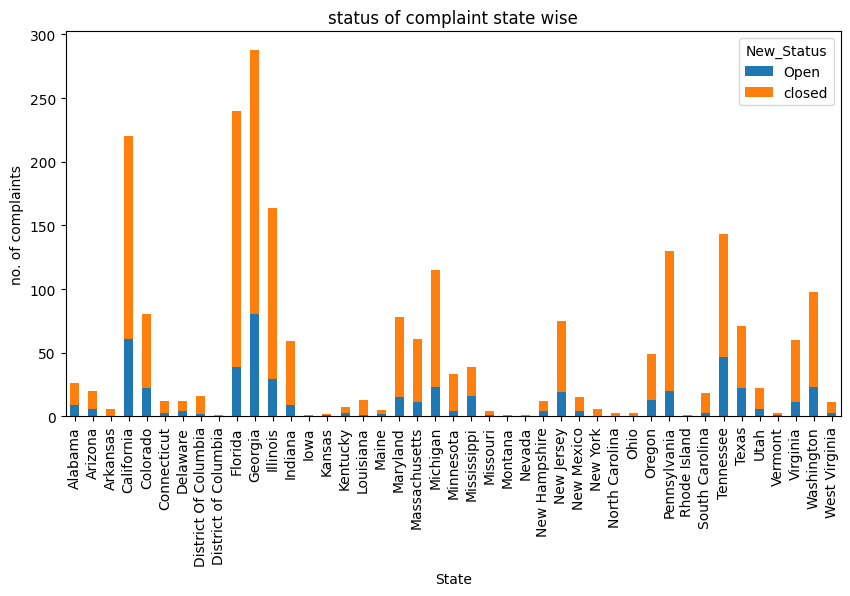

In [32]:
comcast_tele_consumer_status_by_state.plot(kind='bar',stacked=True,title='status of complaint state wise',ylabel='no. of complaints',
                                           figsize=(10,5))

Which state has the maximum complaints?
- Georgia has maximum number of complaints

**Task 5: Which state has the highest percentage of unresolved complaints**

In [33]:
comcast_tele_consumer_unresolved_complaints=comcast_tele_consumer[comcast_tele_consumer['New_Status']=='Open']


In [34]:
comcast_tele_consumer_unresolved_complaints_counts=comcast_tele_consumer_unresolved_complaints.State.value_counts()

In [35]:
comcast_tele_consumer_unresolved_complaints_counts

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Indiana                  9
Alabama                  9
Arizona                  6
Utah                     6
New Hampshire            4
Delaware                 4
Minnesota                4
New Mexico               4
Connecticut              3
West Virginia            3
South Carolina           3
Kentucky                 3
Maine                    2
District Of Columbia     2
Missouri                 1
Vermont                  1
Kansas                   1
Louisiana                1
Name: State, dtype: int64

<Axes: title={'center': 'Highest percentage of unresolved complaints'}, ylabel='no of complaints'>

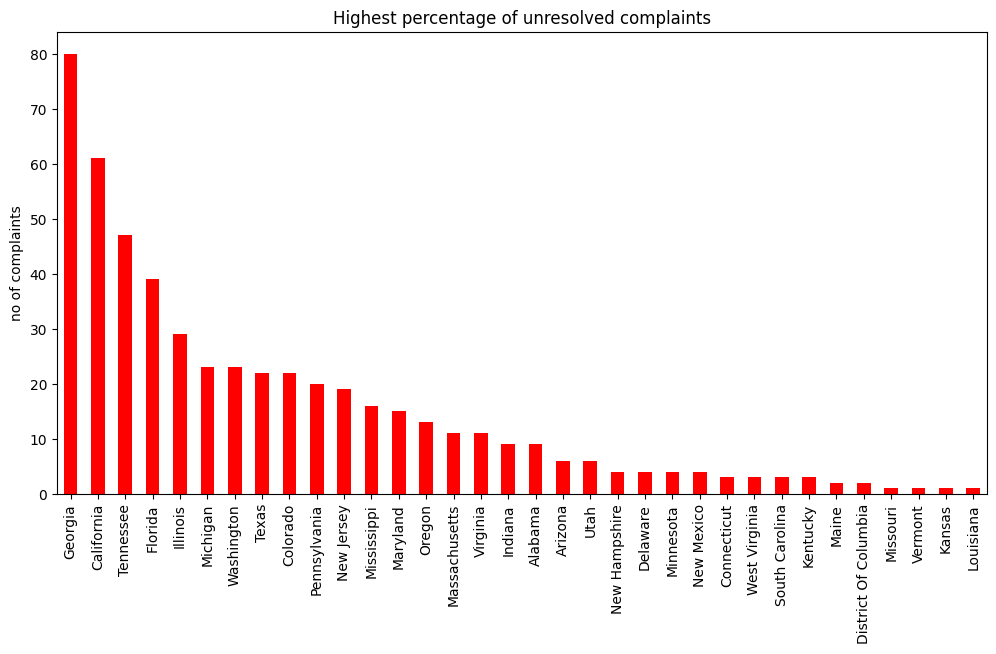

In [36]:
# Georgia has the Highest Number of unresolved complaints
# Show this by Bar Graph
comcast_tele_consumer_unresolved_complaints_counts.plot(kind='bar',
                      figsize=(12,6),color="red",ylabel='no of complaints',
                      stacked=True,   title='Highest percentage of unresolved complaints')

**Task 6: Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.**

In [37]:
# Check unique values in Received Via Column
comcast_tele_consumer['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

So there are only two values in that columns so no need to short we can directly proceed to task 6

In [ ]:
comcast_tele_consumer.New_Status.value_counts()

closed    1707
Open       517
Name: New_Status, dtype: int64

<Axes: title={'center': 'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='New_Status'>

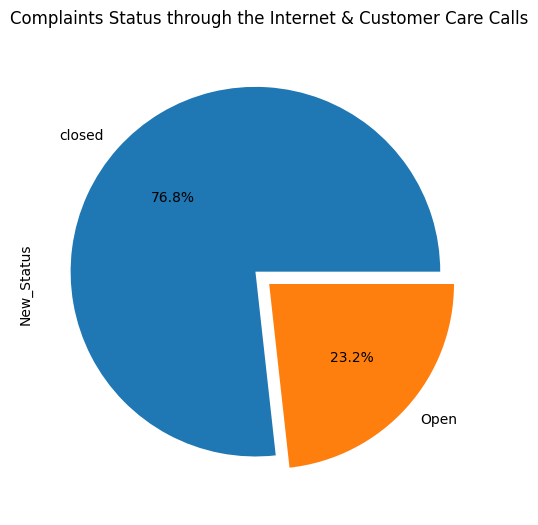

In [38]:
# Used autopct='%1.1f%%'  to show percentage under the pie chart
myexplode = [0.1, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
comcast_tele_consumer.New_Status.value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',
                        figsize = (14,6))